## SGD방식으로 Ridge Regression/Lasso Regression 구현하기
#### [8. 확률적 경사 하강법]에서는 SGD방식으로 Logistic Regression(Classification)을 구현했다.
#### 직접 SGD방식으로 Ridge Regression/Lasso Regression(Regression)을 구현해보자.

In [ ]:
import pandas as pd

# 농어 56마리 [길이, 높이, 두께] 데이터 받아오기
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy() # 넘파이 배열로 변환
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
import numpy as np

# 농어 56마리 무게 데이터
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [ ]:
# train set과 test set으로 나누기 (기본 train set: 75%, test set: 25%)
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [ ]:
# 새로운 특성 만들기 (기본 degree값은 2)
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# 객체 생성 # 5제곱까지 특성 만들기 (기본 degree값은 2)
poly = PolynomialFeatures(degree=5, include_bias=False)

# 객체 training
poly.fit(train_input)
# train_input 변환
train_poly = poly.transform(train_input)
# test_input 변환
test_poly = poly.transform(test_input)

In [ ]:
print(train_poly.shape)

(42, 55)


In [ ]:
# Z-Score Normalization
from sklearn.preprocessing import StandardScaler

# 객체 생성
ss = StandardScaler()
# 객체 훈련 # train input data에 대해 mean값과 std값이 구해짐
ss.fit(train_poly)

# train_poly 변환(정규화)
train_scaled = ss.transform(train_poly)
# test_poly 변환(정규화)
test_scaled = ss.transform(test_poly) # 반드시 train set의 통계 값으로 변환해야함(반드시 train set으로 fit)

### 참고
#### - SGDClassifier에서 partial_fit() 메서드를 사용할 때 classes 매개변수는 클래스 레이블의 유니크한 값을 지정하는 것이 중요합니다. 이것은 다중 클래스 분류 (Multiclass Classification) 문제를 다루는 경우 특히 중요합니다. partial_fit()를 사용할 때, 클래스 레이블의 유니크한 값들을 classes 매개변수로 지정해야 합니다.

#### - 반면에 SGDRegressor는 회귀 문제를 다루는 모델로 클래스 레이블이 아닌 실수 값인 타깃 값을 예측하므로, classes 매개변수는 회귀 문제에서는 필요하지 않습니다. 따라서 SGDRegressor를 사용할 때 partial_fit()를 호출할 때 classes 매개변수를 지정할 필요가 없습니다. 이 모델은 연속적인 실수 값을 예측하는 회귀 문제에 사용되며, 클래스 레이블과 관련이 없습니다.

In [ ]:
# 확률적 경사 하강법(Regression) 사용(loss : 손실 함수, max_iter : 에포크 수, tol : 성능향상 최솟값(성능향상되지 않으면 훈련 종료))
from sklearn.linear_model import SGDRegressor

### Ridge Regression(L2 규제)
#### - 손실 함수는 MSE로 지정

In [ ]:
# 모델 생성
sr = SGDRegressor(loss='squared_error', penalty='l2', random_state=42)

# 에포크마다 점수를 저장할 리스트
train_score = []
test_score = []

In [ ]:
# 300에포크 반복
for _ in range(0, 300):
    sr.partial_fit(train_scaled, train_target)

    train_score.append(sr.score(train_scaled, train_target))
    test_score.append(sr.score(test_scaled, test_target))

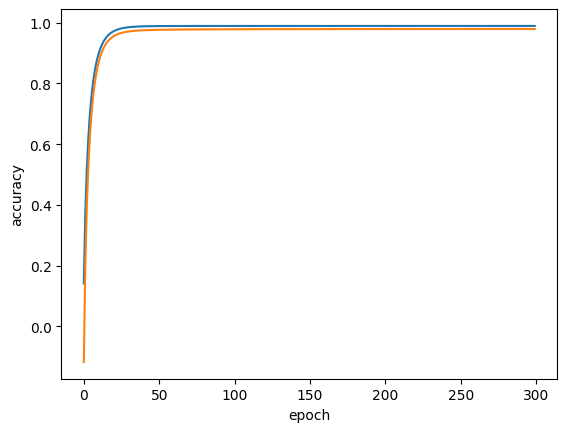

In [ ]:
# 300에포크 동안 기록한 train set, test set의 점수를 그래프로 그리기
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# 모델 생성
sr = SGDRegressor(loss='squared_error', penalty='l2', max_iter=50, tol=None, random_state=42)
# 모델 훈련
sr.fit(train_scaled, train_target)

# 모델 평가
print(sr.score(train_scaled, train_target))
print(sr.score(test_scaled, test_target))

0.9874344438493025
0.978353301558249


### Lasso Regression(L1 규제)
#### - 손실 함수는 MSE로 지정

In [ ]:
# 모델 생성
sr = SGDRegressor(loss='squared_error', penalty='l1', random_state=42)

# 에포크마다 점수를 저장할 리스트
train_score = []
test_score = []

In [ ]:
# 300에포크 반복
for _ in range(0, 300):
    sr.partial_fit(train_scaled, train_target)

    train_score.append(sr.score(train_scaled, train_target))
    test_score.append(sr.score(test_scaled, test_target))

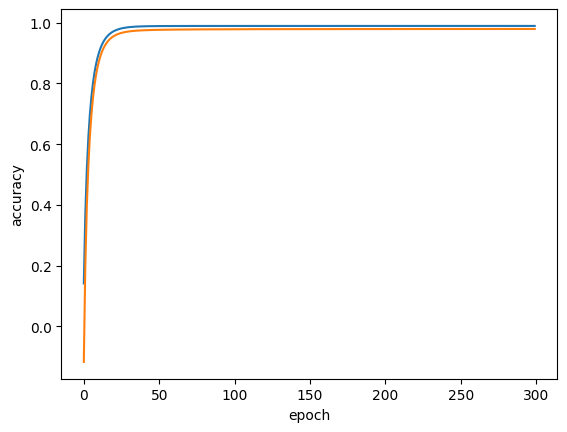

In [ ]:
# 300에포크 동안 기록한 train set, test set의 점수를 그래프로 그리기
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# 모델 생성
sr = SGDRegressor(loss='squared_error', penalty='l1', max_iter=50, tol=None, random_state=42)
# 모델 훈련
sr.fit(train_scaled, train_target)

# 모델 평가
print(sr.score(train_scaled, train_target))
print(sr.score(test_scaled, test_target))

0.9874347903467581
0.9783545988146742
